# Coronavirus Statistics.

In [51]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import folium
import seaborn as sns
import math 

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina' 

## 1. Load Data

In [52]:
# Load confirmed data.
data_confirmed = pd.read_csv("./dataset/time_series_covid19_confirmed_global.csv")
data_confirmed.drop("Province/State", axis = 1, inplace = True)
data_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


In [53]:
# Load deaths data.
data_deaths = pd.read_csv("./dataset/time_series_covid19_deaths_global.csv")
data_deaths.drop("Province/State", axis = 1, inplace = True)
data_deaths.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,4,4,4,4,4,4,6,6,7,7
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,8,10,10,11,15,15,16,17,20,20
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,26,29,31,35,44,58,86,105,130,152
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,3,3,6,8,12,14,15,16,17,18
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,2,2,2,2,2,2,2,2


## 2. General Characteristics (Confirmed Cases). 
### Topic 1. Introducción a Pandas.

In [54]:
data_confirmed.columns

Index(['Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20'],
      dtype='object')

In [55]:
last_day = data_confirmed.columns[-1]
last_day

'4/5/20'

In [56]:
print("Número de casos reportados a nivel mundial")
data_confirmed[last_day].sum()

Número de casos reportados a nivel mundial


1272115

---

Frecuencia (de un evento): es el número de veces en que dicho evento se repite durante un experimento o muestra estadística.

**Moda:** Es el valor con mayor frecuencia en una de las distribuciones de datos.

**Media**:

$\bar{X} = \sum_{k=0}^{n}({X_{k} \cdot \frac{1}{n}})$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Visualisation_mode_median_mean.svg/langes-220px-Visualisation_mode_median_mean.svg.png">

---

**Varianza:** Es medida de dispersión que representa la variabilidad de una serie de datos respecto a su media. 

$\sigma^2$: $\sum_{k=0}^{n}{ ((X_{k} - \bar{X})^2 \cdot \frac{1}{n}) }$

**Desviación Estándar:** $\sqrt{\sigma^2}$

**Covarianza:** Es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Es el dato básico para determinar si existe una dependencia entre ambas variables.

$Cov_{xy} = \sum_{k=1}^{n}((x_{i} - \bar{x}) \cdot (y_{i} - \bar{y}) \cdot \frac{1}{n})$

**Correlación:** Indica la fuerza y la dirección de una relación lineal y proporcionalidad entre dos variables estadísticas. Si tenemos dos variables (A y B) existe correlación entre ellas si al disminuir los valores de A lo hacen también los de B y viceversa. La correlación entre dos variables no implica, por sí misma, ninguna relación de causalidad

$\rho_{xy} = Cov_{xy} \cdot (\sigma_{x} \cdot \sigma_{y})^{-1}$

<img src = "https://uapas1.bunam.unam.mx/matematicas/datos_bivariados/images/img3.png">

**Preguntas.**

1. ¿Cómo deberíamos manejar los datos atípicos?

In [57]:
print("Estadísticas del último día (sin filtros)")
data_confirmed[last_day].describe()

Estadísticas del último día (sin filtros)


count       262.000000
mean       4855.400763
std       25765.035389
min           0.000000
25%          22.000000
50%         214.000000
75%        1020.500000
max      337072.000000
Name: 4/5/20, dtype: float64

In [59]:
cases = int(input("Digite el número de casos: "))
print("Estadísticas del último día (países con más de", cases, "casos reportados)")
data_confirmed[data_confirmed[last_day] > cases][last_day].describe()

Digite el número de casos: 10000
Estadísticas del último día (países con más de 10000 casos reportados)


count        16.000000
mean      68429.375000
std       83249.251995
min       10237.000000
25%       16401.000000
50%       37437.500000
75%       94660.000000
max      337072.000000
Name: 4/5/20, dtype: float64

In [60]:
# Top 10 países a nivel mundial.
print("Top 10 países a nivel mundial")
data_confirmed.sort_values(by = last_day, ascending = False, inplace = True)
print("Ganador: ", data_confirmed[:1]["Country/Region"].values[0])
data_confirmed[["Country/Region", last_day]].head(20)

Top 10 países a nivel mundial
Ganador:  US


,Country/Region,4/5/20
225,US,337072
201,Spain,131646
137,Italy,128948
120,Germany,100123
116,France,92839
62,China,67803
133,Iran,58226
223,United Kingdom,47806
213,Turkey,27069
206,Switzerland,21100


In [61]:
# Extra:
# loc() method is used for indexing by name.
# iloc() is used for indexing bu number.
print("Últimos 5 días del top 5 de países con casos confirmados.")
data_confirmed.iloc[0:5, -5:].head()

Últimos 5 días del top 5 de países con casos confirmados.


,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
225,213372,243453,275586,308850,337072
201,104118,112065,119199,126168,131646
137,110574,115242,119827,124632,128948
120,77872,84794,91159,96092,100123
116,56989,59105,64338,89953,92839


In [62]:
# Set category of Country/Region according to its number of confirmed cases.
def classifier(number):
    if number == 0: return 0
    elif number > 0 and number <= 100: return 1
    elif number > 100 and number <= 1000: return 2
    elif number > 1000 and number <= 10000: return 3
    elif number > 10000 and number <= 100000: return 4
    elif number > 100000 and number <= 1000000: return 5
    else: return 6
data_confirmed["Category"] = data_confirmed[last_day].apply(classifier)
data_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,Category
225,US,37.0902,-95.7129,1,1,2,2,5,5,5,...,121478,140886,161807,188172,213372,243453,275586,308850,337072,5
201,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,73235,80110,87956,95923,104118,112065,119199,126168,131646,5
137,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,92472,97689,101739,105792,110574,115242,119827,124632,128948,5
120,Germany,51.0000,9.0000,0,0,0,0,0,1,4,...,57695,62095,66885,71808,77872,84794,91159,96092,100123,5
116,France,46.2276,2.2137,0,0,2,3,3,3,4,...,37575,40174,44550,52128,56989,59105,64338,89953,92839,4


In [63]:
# Describe statistics according to country category.
print("Estadísticas de acuerdo a la clasificación de los países.")
data_confirmed.groupby(["Category"])[last_day].describe()

Estadísticas de acuerdo a la clasificación de los países.


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
0,2.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
1,98.0,25.459184,25.760662,1.0,7.00,14.0,38.5,98.0
2,95.0,381.536842,247.472621,103.0,175.00,309.0,555.5,997.0
3,51.0,2715.764706,1813.287011,1019.0,1314.50,1908.0,3654.0,8430.0
4,12.0,33090.083333,27199.584654,10237.0,11857.75,20395.5,50411.0,92839.0
5,4.0,174447.250000,109351.165522,100123.0,121741.75,130297.0,183002.5,337072.0


In [64]:
data_confirmed["Category"].value_counts()

1    98
2    95
3    51
4    12
5     4
0     2
Name: Category, dtype: int64

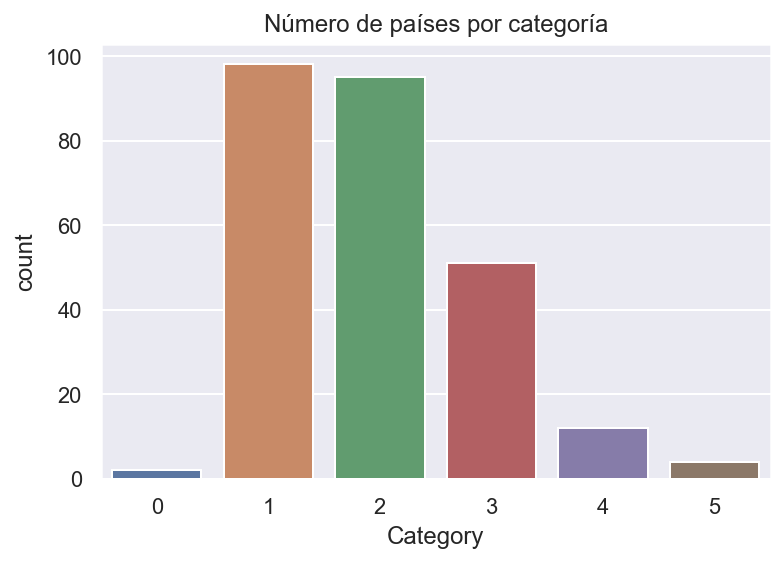

In [65]:
# Plot categories.
sns.countplot(x = "Category", saturation = .7, data = data_confirmed)
plt.title("Número de países por categoría")
plt.show()

### Topic 2. Visual Data Analysis.

Histogramas de los últimos 4 días del top 20 de países.


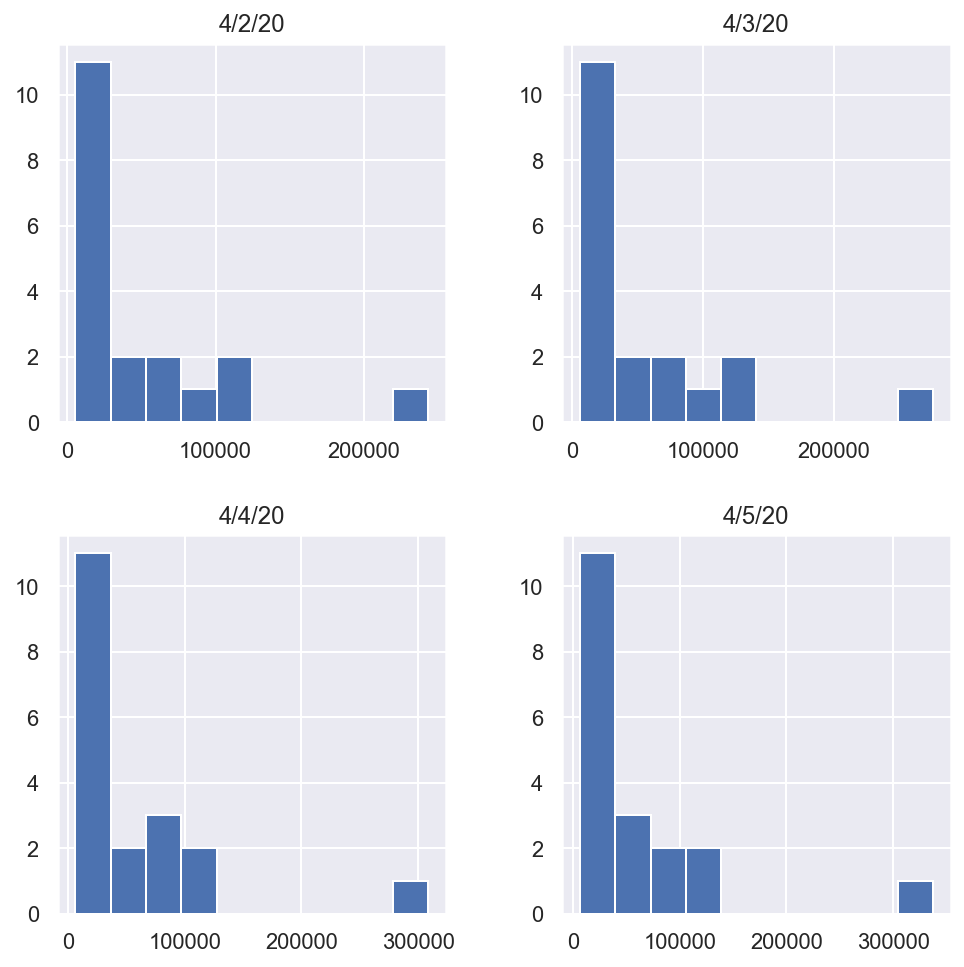

Distribución de los datos en el último día, top 20 países.


F:\Users\JuanCepeda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


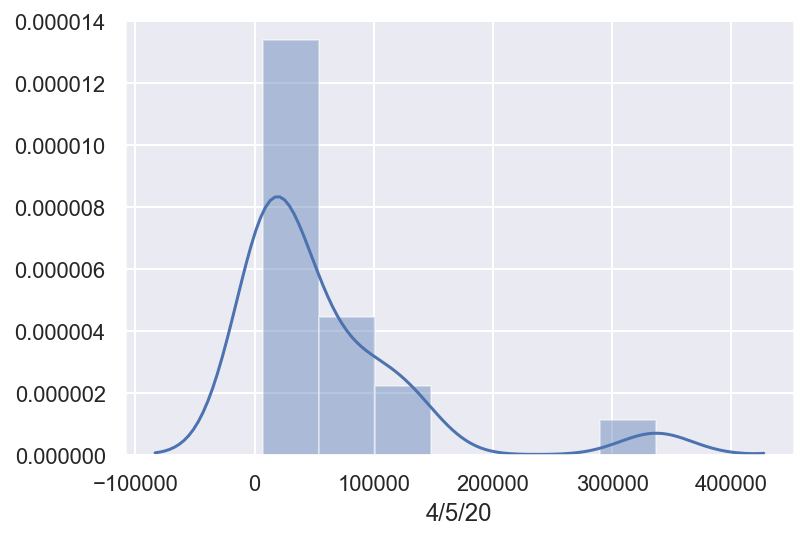

In [66]:
print("Histogramas de los últimos 4 días del top 20 de países.")
features = data_confirmed.columns[-5:-1].values
data_confirmed[0:19][features].hist(figsize=(8, 8))
plt.show()

print("Distribución de los datos en el último día, top 20 países.")
sns.distplot(data_confirmed[0:19][last_day])
plt.show()

**Nota:** Los datos atípicos son aquellos que no pertenecen al rango ($Q_{1} - 1.5 \cdot IQR, Q_{3} + 1.5 \cdot IQR$) donde $Q_{1}$ y $Q_{3}$ corresponden al primer y tercer cuartil respectivamente, y $IQR = Q_{3} - Q_{1}$. Éste último se denomina rango intercuartílico.

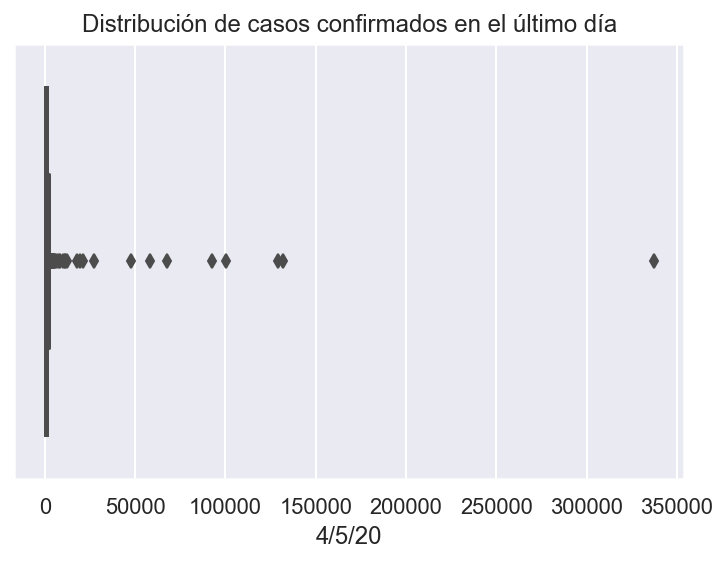

In [67]:
sns.boxplot(x=last_day, data= data_confirmed)
plt.title("Distribución de casos confirmados en el último día")
plt.show()

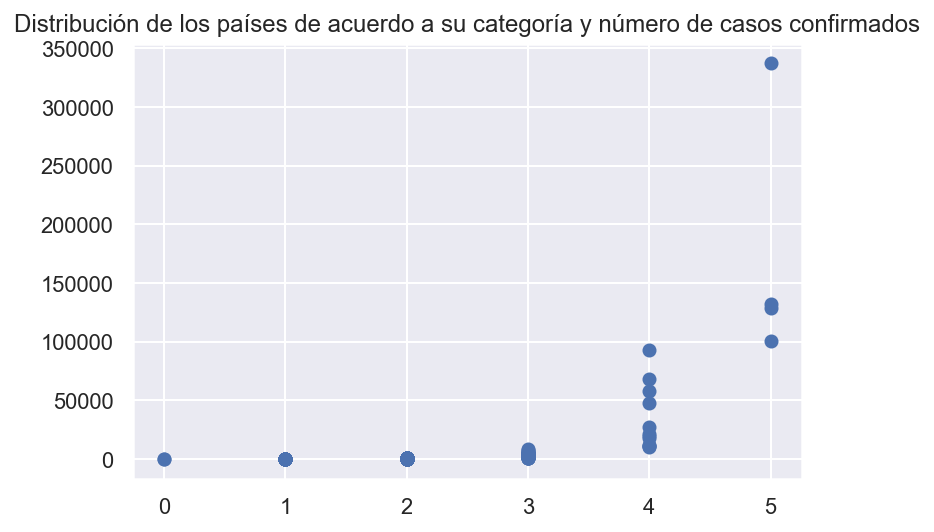

In [68]:
plt.title("Distribución de los países de acuerdo a su categoría y número de casos confirmados")
plt.scatter(data_confirmed["Category"], data_confirmed[last_day])
plt.show()

### Topic 4. Linear Classification and Regression

In [69]:
data_confirmed.columns

Index(['Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', 'Category'],
      dtype='object')

In [70]:
print("Nuestro nuevo dataset")
columns_ = data_confirmed.columns[3: -1]
df = pd.DataFrame(columns = columns_)
for column_name in columns_:
    df[column_name] = pd.Series(data_confirmed[column_name].sum())
df = df.transpose()
df.columns = ["Casos Confirmados"]
df["N.Dia"] = np.arange(len(df.index.values))
df.head()

Nuestro nuevo dataset


,Casos Confirmados,N.Dia
1/22/20,555,0
1/23/20,654,1
1/24/20,941,2
1/25/20,1434,3
1/26/20,2118,4


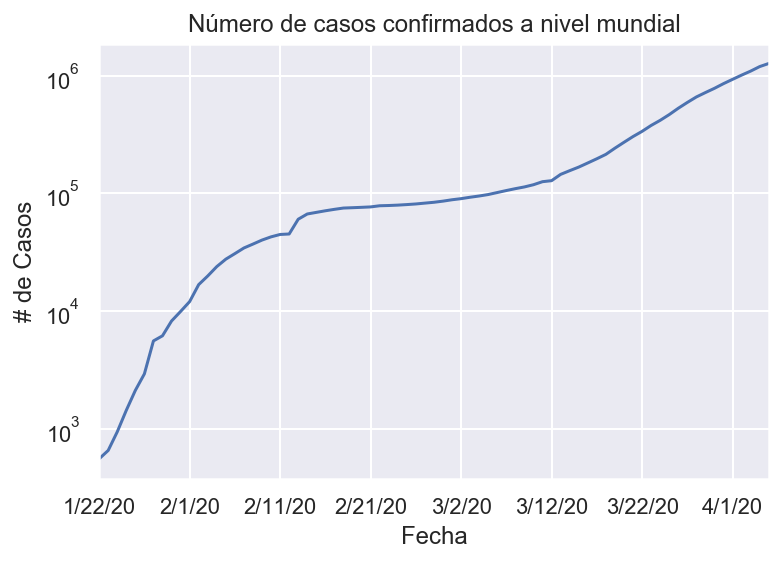

In [71]:
df["Casos Confirmados"].plot(title = "Número de casos confirmados a nivel mundial", logy = True)
plt.xlabel("Fecha")
plt.ylabel("# de Casos")
plt.show()

### Regresión Lineal.

In [72]:
# Import sklearn libraries.
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

In [73]:
# Getting our data.
X = df.iloc[:, 1].values.reshape(-1, 1)[1:]              # Days.
y = np.log10(df.iloc[:, 0].values).reshape(-1, 1)[1:]    # Confirmed cases per day.

#y = df.iloc[:, 0].values).reshape(-1, 1)[1:]

In [74]:
# Splitting the dataset into the Training set and Test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [75]:
# Fitting Simple Linear Regression to the Training set.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Ajuste del Modelos a los Datos de Entrenamiento


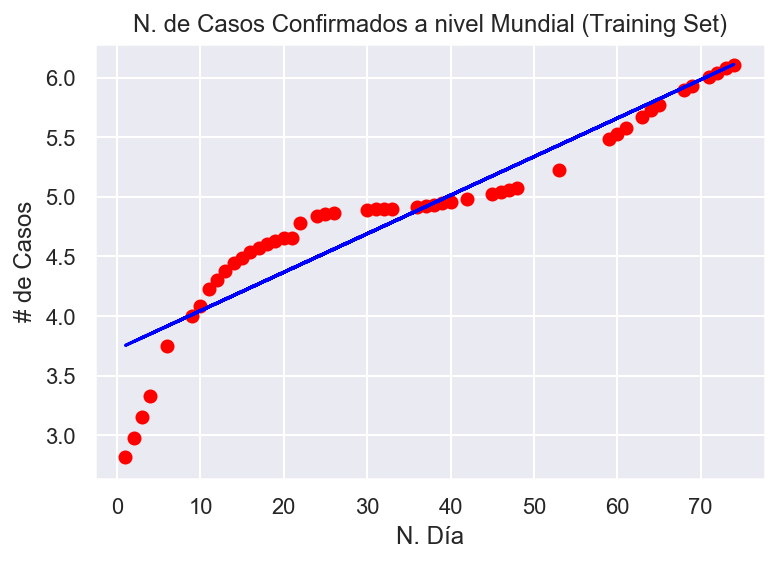

In [76]:
# Visualizing the Training set results.
print("Ajuste del Modelos a los Datos de Entrenamiento")

plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("N. de Casos Confirmados a nivel Mundial (Training Set)")
plt.xlabel("N. Día")
plt.ylabel("# de Casos")
plt.show()

Ajuste del Modelos a los Datos de Prueba


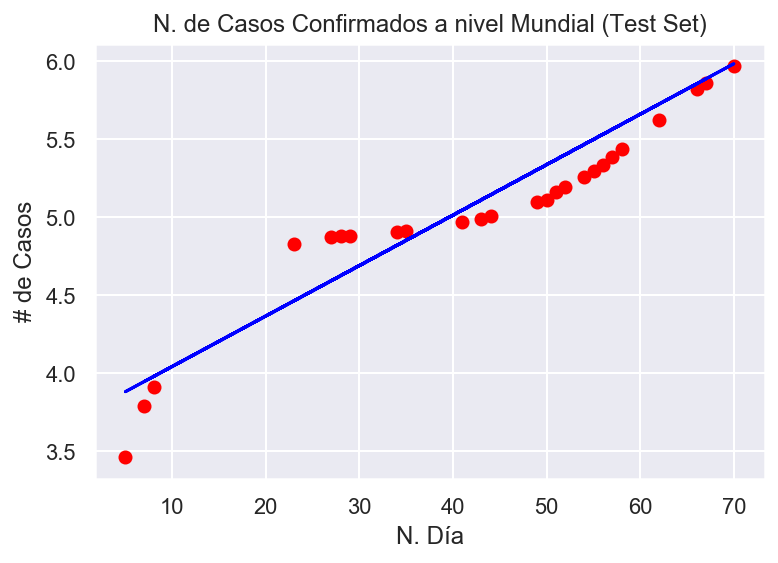

In [77]:
# Visualizing the Training set results.
print("Ajuste del Modelos a los Datos de Prueba")
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, regressor.predict(X_test), color = "blue")
plt.title("N. de Casos Confirmados a nivel Mundial (Test Set)")
plt.xlabel("N. Día")
plt.ylabel("# de Casos")
plt.show()

Ingrese el número de días que desea predecir: 10
Número de infectados dentro de  10  días:  2524949


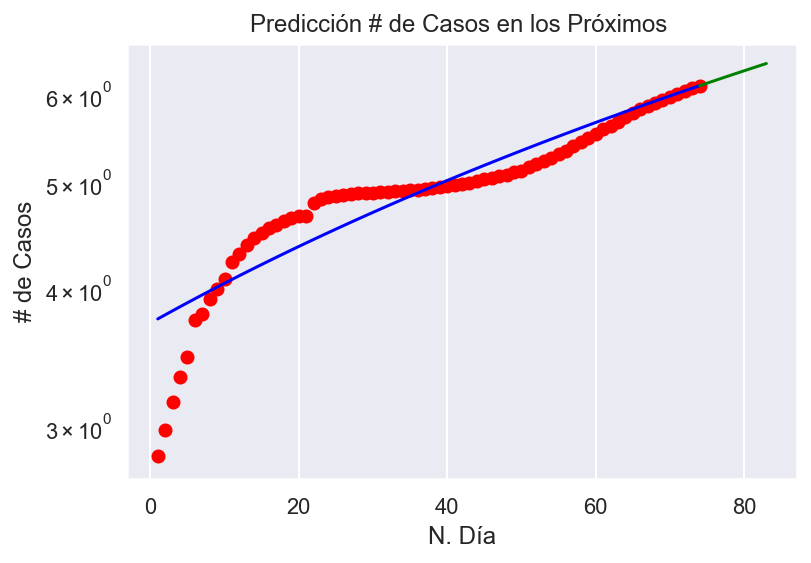

In [84]:
# Predicción para nuevos días.
n = int(input("Ingrese el número de días que desea predecir: "))
days_to_come = np.arange(X[-1][0], X[-1][0] + n).reshape(-1, 1)
predictions = regressor.predict(days_to_come)
print("Número de infectados dentro de ", n," días: ", int(10 ** predictions[-1][0]))

plt.scatter(X, y, color = "red")
plt.plot(X, regressor.predict(X), color = "blue")
plt.plot(days_to_come, predictions, color = "green")
plt.yscale("log")
plt.title("Predicción # de Casos en los Próximos ")
plt.xlabel("N. Día")
plt.ylabel("# de Casos")
plt.show()

In [23]:
# Get Colombia rows.
countries = data_confirmed["Country/Region"]
country_index = countries[countries == "Colombia"].index[0]
confirmed = data_confirmed.iloc[country_index][3:]
deaths = data_deaths.iloc[country_index][3:]

frame = {"Confirmed": confirmed, "Deaths": deaths}
data_colombia = pd.DataFrame(frame)
data_colombia.tail()

,Confirmed,Deaths
3/19/20,102,0
3/20/20,128,0
3/21/20,196,0
3/22/20,231,2
3/23/20,277,3


In [17]:
# Load map data.
map_data = data_confirmed[["Country/Region", "Lat", "Long", "3/23/20"]]

m = folium.Map(
    location = [18.630931, -26.015119],
    zoom_start = 2
)

for i in range(0, len(map_data)):
    folium.Circle(
        radius = map_data.iloc[i][3] / 10,
        location = [map_data.iloc[i]["Lat"], map_data.iloc[i]["Long"]],
        color = "red",
        fill = False, 
        popup = map_data.iloc[i][3]
    ).add_to(m)

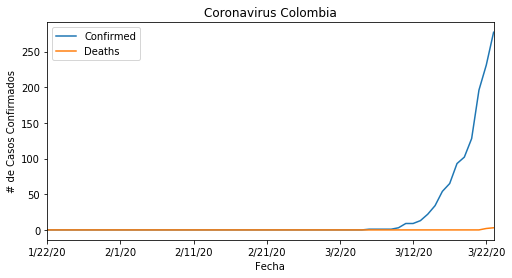

In [18]:
# Plot graph.
data_colombia.plot(
    title = "Coronavirus Colombia", 
    figsize = (8, 4), 
    legend = True, 
    #yticks = data_confirmed_colombia["Colombia"].values,
    use_index = True
)
plt.xlabel("Fecha")
plt.ylabel("# de Casos Confirmados")
plt.show()

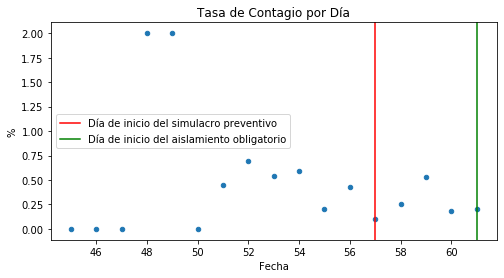

In [21]:
# Rate change per day.
rate_of_change = data_colombia.pct_change()
rate_of_change["num"] = np.arange(len(rate_of_change))

rate_of_change.plot.scatter(
    x = "num", 
    y = "Confirmed",
    figsize = (8, 4), 
    title = "Tasa de Contagio por Día"

)

plt.xlabel("Fecha")
plt.ylabel("%")

plt.axvline(x = 57, color = "red")
plt.axvline(x = 61, color = "green")
plt.legend(["Día de inicio del simulacro preventivo", "Día de inicio del aislamiento obligatorio"])
plt.show()

In [64]:
from sklearn import linear_model 

data_colombia["num"] = np.arange(len(data_colombia))
X = data_colombia["num"]
y = data_colombia["Confirmed"]

from sklearn import linear_model 


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [82]:
X_train.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [65]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[36 50 21 19  9 39 57  3  0 53 47 44].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [57]:
help(reg.predict)

Help on method predict in module sklearn.linear_model.base:

predict(X) method of sklearn.linear_model.base.LinearRegression instance
    Predict using the linear model
    
    Parameters
    ----------
    X : array_like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.

